In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()
os.chdir("..")

In [3]:
import geopandas as gpd
from preprocessing.data_preprocessing import Data_prep
from secrets1 import db_ip, db_password
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point,Polygon

%matplotlib inline

In [24]:
class Review_based_trends(Data_prep):
    """This class analysis the data obtained by the places API.

    Parameters
    ----------
    Data_prep : Class
        This class will mostly inherit its functions and attributes from the
        class Database_connection. Hence, if you have any questions regarding
        the setup please consume the docstring of the Database_connection class.
    """

    def data(self, table_name: str, database_name: str) -> pd.DataFrame:
        return self.remove_duplicate_rows(table_name=table_name,
                                          database_name=database_name)


# Testing area
test = Review_based_trends(db_ip=db_ip, db_password=db_password)
test_data = test.data(table_name="places", database_name="foodtrends")
test_data = test_data.drop(columns = ['icon', 'icon_background_color','place_id','business_status'])
a = ['Subway',"McDonald's"]
test_data = test_data[~test_data['name'].isin(a)]

06-Oct-2021 13:13:56 PM - INFO - Database_connection class initialized


In [9]:
kohler = pd.DataFrame({'Latitude': [48.2566], 'Longitude': [7.8138],'Number':[7.0],'D':[5.0]})
Deutschland_map = gpd.read_file(r"C:\Users\Strahinja\Desktop\books_Germany\Strategy and Performance management\Foodies\review_based_trends\maps\DEU_adm3.shp")

Text(0.5, 1.0, 'Wunderschönes Deutschland!')

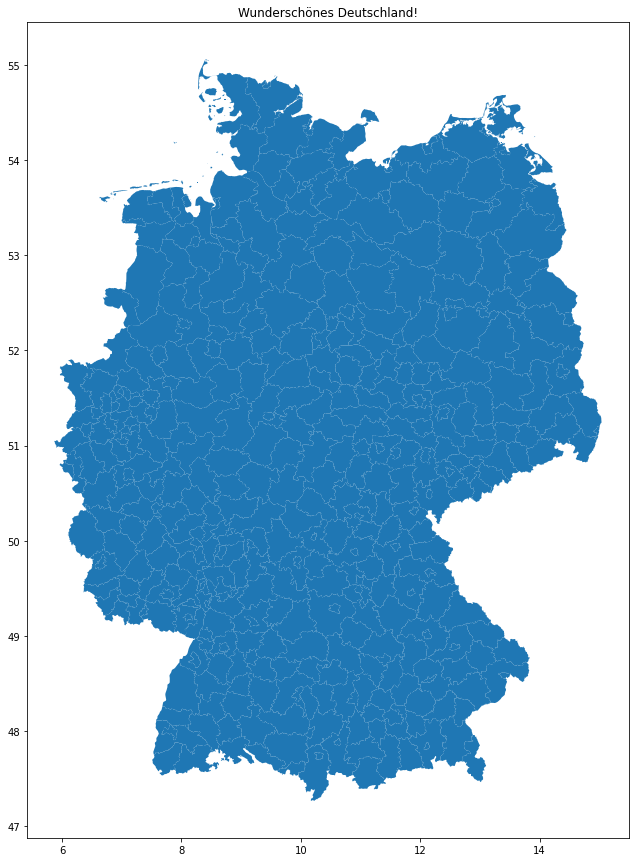

In [10]:
fig,ax = plt.subplots(figsize=(15,15))
Deutschland_map.plot(ax=ax)
plt.title("Wunderschönes Deutschland!")

In [11]:
crs = {'init':'epsg:4326'} # Initiate the coordinate format
geometry = [Point(xy) for xy in zip(test_data['longitude'],test_data['latitude'])]
geometry_kohler = [Point(xy) for xy in zip(kohler['Longitude'],kohler['Latitude'])] # Make the points for plotting
# Make the points for plotting
geometry[:3]

In [12]:
geo_df = gpd.GeoDataFrame(test_data, crs=crs,geometry=geometry)
geo_df2 = gpd.GeoDataFrame(kohler, crs=crs,geometry=geometry_kohler)
geo_df.head(10)

,date_of_scraping,formatted_address,latitude,longitude,name,rating,types,user_ratings_total,geometry
0,2021-10-01,"Augustinerstraße 11, 55116 Mainz, Deutschland",49.996240,8.275680,Best Worscht in Town,4.7,restaurant food point_of_interest establishment,556,POINT (8.27568 49.99624)
1,2021-10-01,"Dominikanerstraße 2, 55116 Mainz, Deutschland",49.998775,8.269635,El Burro,4.6,restaurant food point_of_interest establishment,1597,POINT (8.26963 49.99878)
2,2021-10-01,"Holzhofstraße 15, 55116 Mainz, Deutschland",49.995232,8.275487,Don Baguette Mainz,4.7,restaurant meal_takeaway food point_of_interes...,450,POINT (8.27549 49.99523)
3,2021-10-01,"Große Bleiche 5, 55116 Mainz, Deutschland",50.000578,8.264179,Haus Der Fritten,4.6,restaurant food point_of_interest establishment,41,POINT (8.26418 50.00058)
4,2021-10-01,"Schillstraße 87, 55131 Mainz, Deutschland",49.989661,8.260384,Chicken kokio,4.9,restaurant food point_of_interest establishment,371,POINT (8.26038 49.98966)
5,2021-10-01,"Holzstraße 40, 55116 Mainz, Deutschland",49.997552,8.279829,Weinstube Am Holztor,4.7,restaurant food point_of_interest establishment,291,POINT (8.27983 49.99755)
6,2021-10-01,"Mitternachtsgasse 1, 55116 Mainz, Deutschland",50.002592,8.271888,SAUSALITOS,3.9,bar restaurant food point_of_interest establis...,1135,POINT (8.27189 50.00259)
7,2021-10-01,"Sertoriusring 37- Finthen, 55126 Mainz, Deutsc...",49.996442,8.176570,Jezz Burger,4.7,restaurant food point_of_interest establishment,81,POINT (8.17657 49.99644)
8,2021-10-01,"Mainz-Kastel-Kastel, Peter-Sander-Straße 17a, ...",50.027001,8.273964,"Hexenküche, Wellness Food Company",4.8,restaurant food point_of_interest establishment,48,POINT (8.27396 50.02700)
9,2021-10-01,"Mombacher Str. 11-15, 55122 Mainz, Deutschland",50.001328,8.256889,CAIRO.65,5.0,restaurant food point_of_interest establishment,2,POINT (8.25689 50.00133)


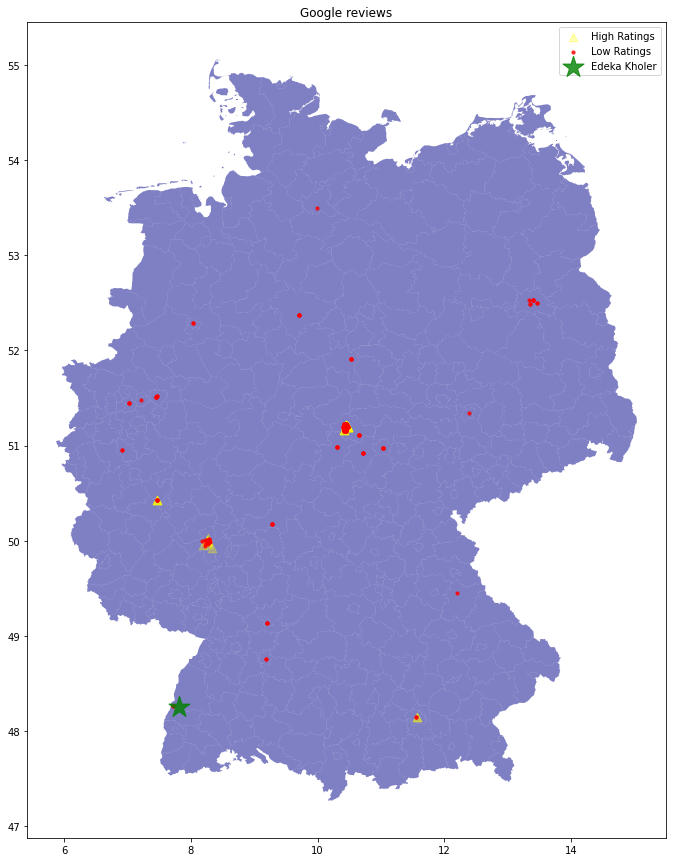

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
Deutschland_map.plot(color='darkblue', ax=ax, alpha = 0.5)
geo_df[geo_df['rating'] >= 4.8].geometry.plot(marker='^', color = 'yellow', ax = ax, label = 'High Ratings', alpha=.3, markersize = 75 )
geo_df[geo_df['rating'] < 4.8].geometry.plot(marker='o', color = 'red', ax = ax, label = 'Low Ratings', alpha = .8, markersize = 10)
geo_df2[geo_df2['Number'] > 5.0].geometry.plot(marker='*', color = 'green', ax = ax, label = 'Edeka Kholer', alpha = .8, markersize = 500)
plt.title('Google reviews')
plt.legend()


In [14]:
test_data[test_data['rating']>4.9]

,date_of_scraping,formatted_address,latitude,longitude,name,rating,types,user_ratings_total,geometry
9,2021-10-01,"Mombacher Str. 11-15, 55122 Mainz, Deutschland",50.001328,8.256889,CAIRO.65,5.0,restaurant food point_of_interest establishment,2,POINT (8.25689 50.00133)
11,2021-10-01,"Bahnhofpl. 1A, 55116 Mainz, Deutschland",50.001930,8.258660,Systemgastronomie van der Broeck GmbH & Co. KG,5.0,restaurant food point_of_interest establishment,1,POINT (8.25866 50.00193)
50,2021-10-01,"Hindenburgstraße 30, 55118 Mainz, Deutschland",50.007930,8.261070,Frank's Fit Kitchen,5.0,food point_of_interest establishment,10,POINT (8.26107 50.00793)
51,2021-10-01,"Leichhof 8, 55116 Mainz, Deutschland",49.997903,8.273666,Piccola Salumeria Stella,5.0,grocery_or_supermarket food point_of_interest ...,75,POINT (8.27367 49.99790)
56,2021-10-01,"Bahnhofpl. 2, 55116 Mainz, Deutschland",50.001239,8.260304,Bistro U1,5.0,bar cafe restaurant food point_of_interest est...,2,POINT (8.26030 50.00124)
125,2021-10-02,"Langensalzaer Landstraße 25, 99974 Mühlhausen/...",51.199728,10.473694,Heiße Ecke,5.0,restaurant food point_of_interest establishment,13,POINT (10.47369 51.19973)
135,2021-10-02,"Kornmarkt 5/6, 99974 Mühlhausen/Thüringen, Deu...",51.208450,10.457290,Il Chianti,5.0,grocery_or_supermarket food point_of_interest ...,1,POINT (10.45729 51.20845)
141,2021-10-02,"Mittelstraße 138, 99974 Mühlhausen/Thüringen, ...",51.213611,10.448039,Restaurant Cambrinus Inh. Erich Wand,5.0,restaurant food point_of_interest establishment,4,POINT (10.44804 51.21361)
154,2021-10-02,"Langendorfer Str. 155, 56564 Neuwied, Deutschland",50.426430,7.462706,Restaurant marktbistro,5.0,restaurant bar food point_of_interest establis...,4,POINT (7.46271 50.42643)
161,2021-10-02,"Untermarkt 37, 99974 Mühlhausen/Thüringen, Deu...",51.207537,10.457978,Mangal Grill,5.0,restaurant food point_of_interest establishment,10,POINT (10.45798 51.20754)
